<a href="https://colab.research.google.com/github/eun-88/DataScientist_07/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='time'>

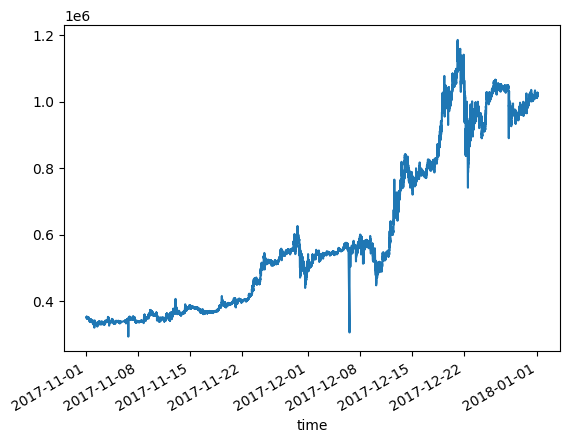

In [9]:
# 데이터 경로
DATA_PATH = "/content/"

# 데이터 불러오기
modify_data = pd.read_csv(os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv'), index_col=0, parse_dates=True)

# 불러온 데이터 시각화하기
modify_data.loc['2017-11-01':'2017-12-31','close'].plot()

In [10]:
# Q. 코드를 작성해주세요

# window 지정
window = 10

# momentum_signal 만들기
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].shift(window)) + 1)

# s_momentum_signal 만들기
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index)

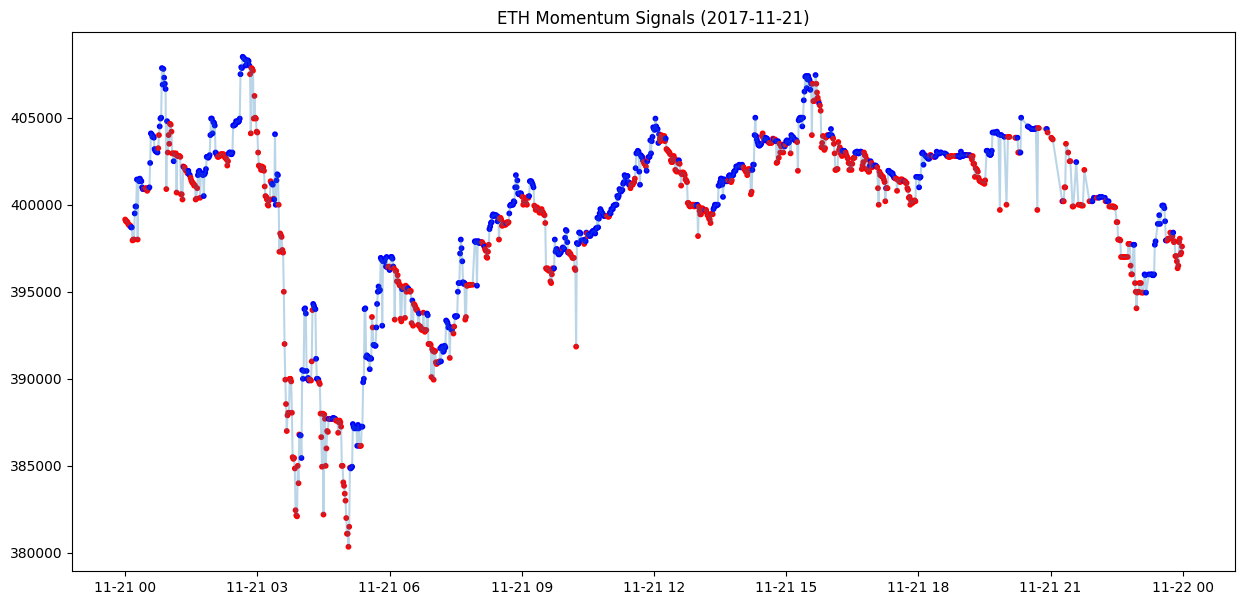

In [11]:
# Q. 코드를 작성해주세요

# 기존 데이터 만들기
sub_data = modify_data.loc['2017-11-21':, 'close']

# 수식 적용된 데이터 만들기
c_sig = s_momentum_signal.loc['2017-11-21']

# 두 데이터의 비교를 위한 색상 바꾸기
c_sig = c_sig.to_frame(name='signal') # Series를 DataFrame으로 변환하여 컬럼 추가
c_sig['color'] = np.where(c_sig['signal'] == 1, 'blue', 'red')

# 시각화하기
plt.figure(figsize=(15, 7))
plt.scatter(c_sig.index, modify_data.loc['2017-11-21', 'close'],
            c=c_sig['color'], s=10) # 신호에 따라 점의 색상을 다르게 표현
plt.plot(modify_data.loc['2017-11-21', 'close'], alpha=0.3) # 흐릿한 선 추가
plt.title('ETH Momentum Signals (2017-11-21)')
plt.show()

In [12]:
# Q. 코드를 작성해주세요
window = 10
# momentum_signal
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].rolling(window).mean()) + 1)

# s_momentum_signal
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index)

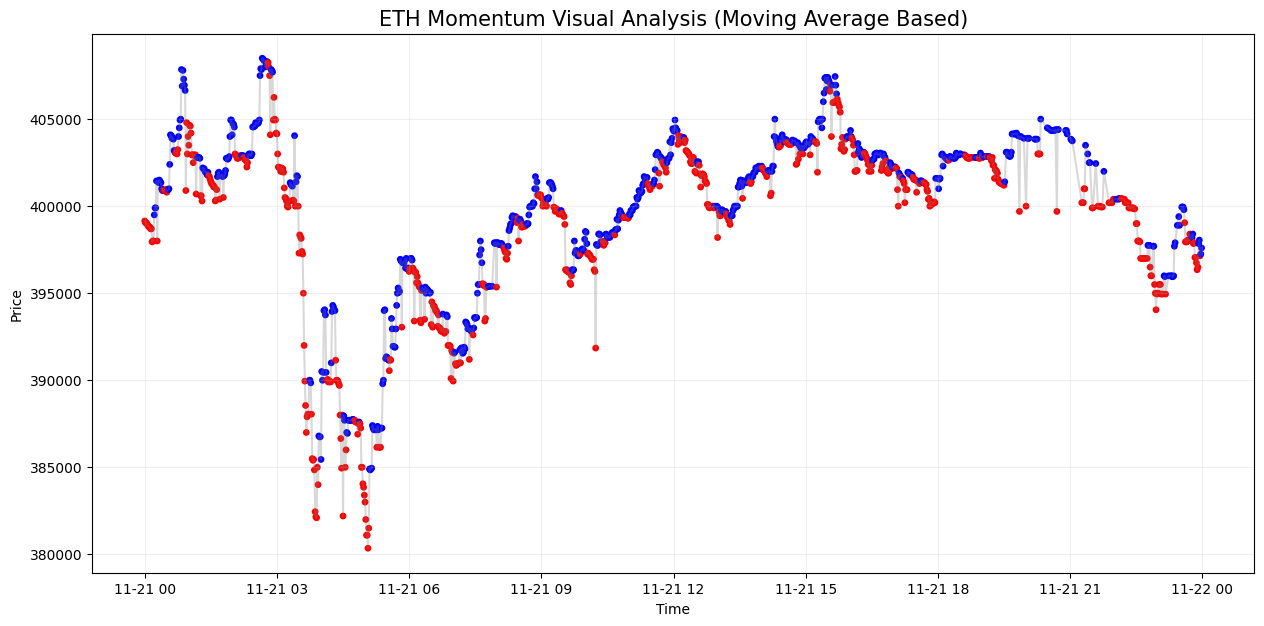

In [13]:


# 1. 기존 데이터 만들기
# 2017-11-21부터의 종가(close) 데이터를 추출합니다.
sub_data = modify_data.loc['2017-11-21':, 'close']

# 2. 수식 적용된 데이터 만들기
# 앞서 만든 s_momentum_signal(이동평균 기반)에서 2017-11-21 데이터를 가져옵니다.
c_sig = s_momentum_signal.loc['2017-11-21']

# 3. 두 데이터의 비교를 위한 색상 바꾸기
# 신호를 데이터프레임으로 변환 후, 1이면 'blue', 0이면 'red'를 부여합니다.
c_sig = c_sig.to_frame(name='signal')
c_sig['color'] = np.where(c_sig['signal'] == 1, 'blue', 'red')

# 4. 시각화하기
plt.figure(figsize=(15, 7))

# 바탕이 되는 가격 선 (연하게 표시)
plt.plot(modify_data.loc['2017-11-21', 'close'], color='gray', alpha=0.3)

# 모멘텀 신호에 따른 색상 점 (scatter)
plt.scatter(c_sig.index, modify_data.loc['2017-11-21', 'close'],
            c=c_sig['color'], s=15)

plt.title('ETH Momentum Visual Analysis (Moving Average Based)', fontsize=15)
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True, alpha=0.2)
plt.show()

In [14]:
def get_local_min_max(close, wait=3):
    min_value = close.iloc[0]
    max_value = close.iloc[0]
    n_cnt_min, n_cnt_max = 0, 0

    mins, maxes = [], []
    min_idxes, max_idxes = [], []
    b_min_update, b_max_update = False, False

    for idx, val in zip(close.index[1:], close.values[1:]):
        if val < min_value:
            min_value = val
            mins.append(min_value)
            min_idxes.append(idx)
            n_cnt_min = 0
            b_min_update = True

        if val > max_value:
            max_value = val
            maxes.append(max_value)
            max_idxes.append(idx)
            n_cnt_max = 0
            b_max_update = True

        if not b_max_update:
            b_min_update = False
            n_cnt_min += 1
            if n_cnt_min >= wait:
                max_value = min_value
                n_cnt_min = 0

        if not b_min_update:
            b_max_update = False
            n_cnt_max += 1
            if n_cnt_max >= wait:
                min_value = max_value
                n_cnt_max = 0

    # ⑧ 결과 반환: Dictionary 형태 (각 value는 DataFrame)
    return {
        'mins': pd.DataFrame({'price': mins}, index=min_idxes),
        'maxes': pd.DataFrame({'price': maxes}, index=max_idxes)
    }

In [15]:
# 함수가 딕셔너리를 반환한다고 가정할 때
result = get_local_min_max(sub_data, wait=3)

print("--- Local Minima (저점 데이터프레임 상단 5개) ---")
# 따옴표 없이 변수명을 써야 데이터가 나옵니다.
print(result['mins'].head())

print('\n' + '--'*20)

print("--- Local Maxima (고점 데이터프레임 상단 5개) ---")
print(result['maxes'].head())

--- Local Minima (저점 데이터프레임 상단 5개) ---
                      price
2017-11-21 00:01:00  399050
2017-11-21 00:03:00  399000
2017-11-21 00:04:00  398900
2017-11-21 00:05:00  398850
2017-11-21 00:06:00  398800

----------------------------------------
--- Local Maxima (고점 데이터프레임 상단 5개) ---
                      price
2017-11-21 00:13:00  399500
2017-11-21 00:14:00  399900
2017-11-21 00:16:00  401450
2017-11-21 00:19:00  401350
2017-11-21 00:20:00  401500


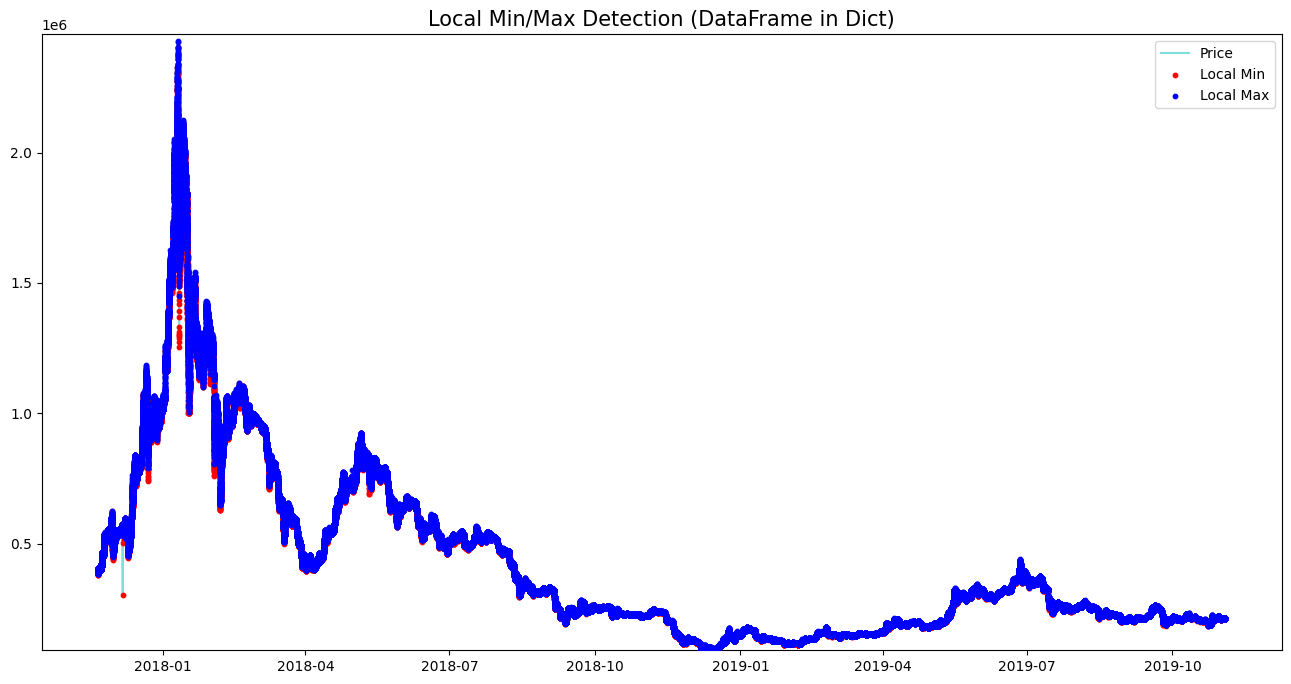

In [16]:


# 함수 실행 (반환값은 딕셔너리 하나)
local_result = get_local_min_max(sub_data, wait=3)

# subplots 및 plot 생성
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(sub_data, 'c', alpha=0.5, label='Price')

# min_time, local_min을 활용한 scatter plot 생성 (Dictionary에서 데이터 추출)
# result['mins'].index 가 시간(min_time)이고, result['mins']['price'] 가 값(local_min)입니다.
ax.scatter(local_result['mins'].index, local_result['mins']['price'],
           color='red', s=10, label='Local Min', zorder=3)

# maxes_time, local_max를 활용한 scatter plot 생성
ax.scatter(local_result['maxes'].index, local_result['maxes']['price'],
           color='blue', s=10, label='Local Max', zorder=3)

# y축 설정
ax.set_ylim([sub_data.min() * 0.99, sub_data.max() * 1.01])

ax.set_title('Local Min/Max Detection (DataFrame in Dict)', fontsize=15)
ax.legend()
plt.show()

In [17]:
def t_val_lin_r(close):
    import statsmodels.api as sml

    # t-value from a linear trend
    x = np.ones((close.shape[0], 2))
    x[:, 1] = np.arange(close.shape[0])
    ols = sml.OLS(close, x).fit()
    return ols.tvalues[1]

In [18]:
look_forward_window = 60
min_sample_length = 5
step = 1
t1_array = []
t_values_array = []

In [19]:
from tqdm import tqdm

# 분석 대상 기간 설정
molecule = modify_data['2017-11-01':'2017-11-30'].index
label = pd.DataFrame(index=molecule, columns=['t1', 't_val', 'bin'])
tmp_out = []

for ind in tqdm(molecule):
    # 현재 시점(ind)부터 지정된 전방 탐색 창(look_forward_window)만큼 샘플 추출
    subset = modify_data.loc[ind:, 'close'].iloc[:look_forward_window]

    if look_forward_window > subset.shape[0]:
        continue

    # t-value들을 저장할 임시 Series 생성
    tmp_subset = pd.Series(index=subset.index[min_sample_length-1:subset.shape[0]-1])
    tval = []

    # 회귀분석을 통해 각 forward_window 지점까지의 t-통계량 계산
    for forward_window in np.arange(min_sample_length, subset.shape[0]):
        df = subset.iloc[:forward_window]
        # 앞서 정의한 t_val_lin_r 함수를 호출하여 t-value 계산
        tval.append(t_val_lin_r(df))  # [[YOUR CODE]] - ①

    # t-value 배열을 Series에 할당
    tmp_subset.loc[tmp_subset.index] = np.array(tval)

    # 절대값이 가장 큰 t-value를 찾는 지점이 '최적의 추세' 지점
    idx_max = tmp_subset.replace([-np.inf, np.inf, np.nan], 0).abs().idxmax()
    tmp_t_val = tmp_subset[idx_max]

    # [추세 종료 시점(t1), 해당 시점의 t-value, 방향성(1 or -1)] 저장
    tmp_out.append([idx_max, tmp_t_val, np.sign(tmp_t_val)])

# 결과 데이터를 DataFrame에 할당 (데이터 누수 방지를 위해 수집된 tmp_out 사용)
label.loc[molecule[:len(tmp_out)]] = np.array(tmp_out)  # [[YOUR CODE]] - ②

# 데이터 타입 정리
label['t1'] = pd.to_datetime(label['t1'])
label['bin'] = pd.to_numeric(label['bin'], downcast='signed')

100%|██████████| 33384/33384 [17:05<00:00, 32.57it/s]


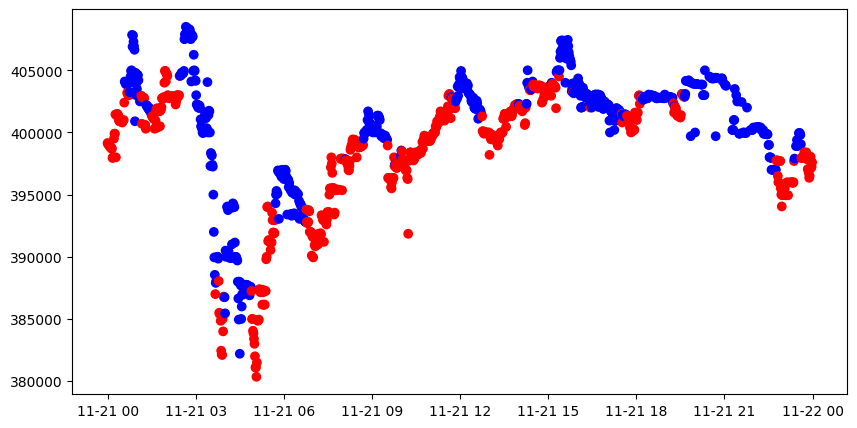

In [20]:
# 시각화
sub_data = modify_data.loc['2017-11-21', 'close']
c_sig = label['bin'].loc['2017-11-21']
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(sub_data.index, sub_data.values, c=c_sig['color'])

In [21]:
# !pip install ta == 0.9.0
# !pip install shap

In [1]:
# 기존 설치본을 지우고 새로 강제 설치
!pip install --upgrade --force-reinstall ta==0.9.0
!pip install --upgrade --force-reinstall shap

# 또는 의존성 무시하고 강제 설치
!pip install --ignore-installed ta==0.9.0

  Using cached ta-0.9.0-py3-none-any.whl
  Using cached numpy-2.4.1-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (6.6 kB)
  Using cached pandas-2.3.3-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached numpy-2.4.1-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.4 MB)
Using cached pandas-2.3.3-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (12.4 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.3-py2.py3-none-any.whl (348 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pytz
    Found exi

  Using cached shap-0.50.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (25 kB)
  Using cached numpy-2.4.1-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (6.6 kB)
  Using cached scipy-1.17.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached scikit_learn-1.8.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (11 kB)
  Using cached pandas-2.3.3-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.63.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.9 kB)
  Using cached cloudpickle-3.1.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cach

KeyboardInterrupt: 

In [1]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

In [2]:
import sys
import os

# 현재 경로를 시스템 경로에 추가
sys.path.append(os.getcwd())

# 이제 다시 import 시도
from libs.feature_importance import importance as imp

In [3]:
from sklearn.feature_selection import SequentialFeatureSelector, RFECV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [4]:
# 데이터 경로 설정
DATA_PATH = '/content/'
anno_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick_label.pkl')
target_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv')

# 데이터 불러오기
df_modify_data = pd.read_csv(target_file_name, index_col=0, parse_dates=True)
df_label_data = pd.read_pickle(anno_file_name)
df_sub_modify_data = df_modify_data.loc[df_label_data.index]

# 학습 시간 단축을 위해 여기선 편의상 1000개의 데이터만 가져옵니다.
df_sub_modify_data = df_sub_modify_data.iloc[:1000]

In [5]:
# 기술적 지표를 적용합니다.

mt = 1
fillna = False
df_ = df_sub_modify_data.copy()
open, high, low, close, volume = 'open', 'high', 'low', 'close', 'volume'
cols = [open, high, low, close, volume]

## Volume Index
# Chaikin Money Flow
df_["volume_cmf"] = ta.volume.ChaikinMoneyFlowIndicator(
                        high=df_[high], low=df_[low], close=df_[close], volume=df_[volume], window=20*mt, fillna=fillna
                    ).chaikin_money_flow()
# Force Index
df_["volume_fi"] = ta.volume.ForceIndexIndicator(
                        close=df_[close], volume=df_[volume], window=15*mt, fillna=fillna
                    ).force_index()
# Money Flow Indicator
df_["volume_mfi"] = ta.volume.MFIIndicator(
                        high=df_[high],
                        low=df_[low],
                        close=df_[close],
                        volume=df_[volume],
                        window=15*mt,
                        fillna=fillna,
                    ).money_flow_index()
# Ease of Movement
df_["volume_sma_em"] = ta.volume.EaseOfMovementIndicator(
                            high=df_[high], low=df_[low], volume=df_[volume], window=15*mt, fillna=fillna
                        ).sma_ease_of_movement()

# Volume Price Trend
df_["volume_vpt"] = ta.volume.VolumePriceTrendIndicator(
                        close=df_[close], volume=df_[volume], fillna=fillna
                    ).volume_price_trend()

## volatility index
# Average True Range
df_["volatility_atr"] = ta.volatility.AverageTrueRange(
                            close=df_[close], high=df_[high], low=df_[low], window=10*mt, fillna=fillna
                        ).average_true_range()

# Ulcer Index
df_["volatility_ui"] = ta.volatility.UlcerIndex(
                            close=df_[close], window=15*mt, fillna=fillna
                        ).ulcer_index()

## trend index
# MACD
df_["trend_macd_diff"] = ta.trend.MACD(
                            close=df_[close], window_slow=25*mt, window_fast=10*mt, window_sign=9, fillna=fillna
                        ).macd_diff()

# Average Directional Movement Index (ADX)
df_["trend_adx"] = ta.trend.ADXIndicator(
                        high=df_[high], low=df_[low], close=df_[close], window=15*mt, fillna=fillna
                    ).adx()

# TRIX Indicator
df_["trend_trix"] = ta.trend.TRIXIndicator(
                        close=df_[close], window=15*mt, fillna=fillna
                    ).trix()

# Mass Index
df_["trend_mass_index"] = ta.trend.MassIndex(
                            high=df_[high], low=df_[low], window_fast=10*mt, window_slow=25*mt, fillna=fillna
                        ).mass_index()

# DPO Indicator
df_["trend_dpo"] = ta.trend.DPOIndicator(
                        close=df_[close], window=20*mt, fillna=fillna
                    ).dpo()

# Aroon Indicator
df_["trend_aroon_ind"] = ta.trend.AroonIndicator(
    close=df_[close],  # Aroon은 보통 고가/저가 외에 종가 기반 계산이 포함되기도 함
    window=25,
    fillna=False
).aroon_indicator()


## momentum index
# Relative Strength Index (RSI)
df_["momentum_rsi"] = ta.momentum.RSIIndicator(close=df_[close], window=15*mt, fillna=fillna).rsi()

# Williams R Indicator
df_["momentum_wr"] = ta.momentum.WilliamsRIndicator(
                        high=df_[high], low=df_[low], close=df_[close], lbp=15*mt, fillna=fillna
                    ).williams_r()

/usr/local/lib/python3.12/dist-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.12/dist-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


In [6]:
# 수익률 / 변동성 지표를 적용합니다.
windows_mom = [5, 10, 20]
windows_std = [30]

for i in windows_mom:
    df_[f'vol_change_{i}'] = df_.volume.pct_change(i).round(6)
    df_[f'ret_{i}'] = df_.close.pct_change(i).round(6)

for i in windows_std:
    df_[f'std_{i}'] = df_.close.rolling(i).std()
    df_[f'vol_std_{i}'] = df_.volume.rolling(i).std()

In [7]:
# Q. 코드를 작성해주세요

df_tmp_data = df_.join(df_label_data).dropna()

# X, y 데이터셋 만들기
# iloc[:, 5:-1]은 기술적 지표들을 선택하며, 마지막 컬럼인 label을 제외합니다.
X = df_tmp_data.iloc[:, 5:-1]
# 마지막 컬럼인 label 데이터를 y로 설정합니다.
y = df_tmp_data.iloc[:, -1]

# StandardScaler 적용
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fit_transform 사용 (데이터의 평균과 표준편차를 계산함과 동시에 변환 수행)
X_sc = sc.fit_transform(X)

# DataFrame 변환 (학습 시 컬럼명을 유지하기 위함)
X_sc = pd.DataFrame(X_sc, index=X.index, columns=X.columns)

In [8]:
# Q. 코드를 작성해주세요

from sklearn.ensemble import RandomForestClassifier

# RandomForest 모델 적용
# n_estimators: 결정 트리 개수 (보통 100~500 사이 설정)
# random_state: 결과 재현을 위한 난수 고정 값
# n_jobs: 모든 CPU 코어를 사용하여 학습 속도 향상 (-1 설정)
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# RandomForest fit 하기
# 학습 데이터 X_sc와 타겟 데이터 y를 사용하여 모델을 학습시킵니다.
rfc.fit(X_sc, y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [9]:
# MDI, Mean Decrease Impurity
feat_imp = imp.mean_decrease_impurity(rfc, X.columns)
feat_imp

,mean,std
volume_cmf,0.043181,0.002026
volume_fi,0.041182,0.002170
volume_mfi,0.046862,0.002921
volume_sma_em,0.035438,0.001779
volume_vpt,0.022161,0.001332
volatility_atr,0.074043,0.003054
volatility_ui,0.051396,0.002766
trend_macd_diff,0.083763,0.004397
trend_adx,0.051871,0.002067
trend_trix,0.063397,0.002408


In [10]:
# MDA, Mean Decrease Accuracy
svc_rbf = SVC(kernel='rbf', probability=True) # Tree 및 Support Vector Machine 외에 다른 분류기(classifier)를 사용해봅시다.
cv = KFold(n_splits=5) # n_splits을 변경해봅시다.
feat_imp_mda = imp.mean_decrease_accuracy(svc_rbf, X_sc, y, cv_gen=cv)

/content/libs/feature_importance/importance.py:164: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  importance.replace([-np.inf, np.nan], 0, inplace=True)  # Replace infinite values


In [11]:
# plot_feature_importance 함수 만들기
def plot_feature_importance(importance_df, save_fig=False, output_path=None):
    # Plot mean imp bars with std
    plt.figure(figsize=(10, importance_df.shape[0] / 5))
    importance_df.sort_values('mean', ascending=True, inplace=True)
    importance_df['mean'].plot(kind='barh', color='b', alpha=0.25, xerr=importance_df['std'], error_kw={'ecolor': 'r'})
    if save_fig:
        plt.savefig(output_path)
    else:
        plt.show()

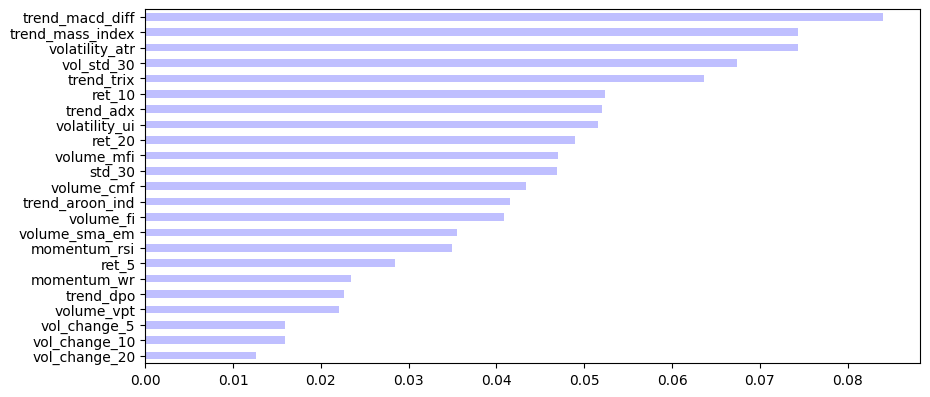

/content/libs/feature_importance/importance.py:164: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  importance.replace([-np.inf, np.nan], 0, inplace=True)  # Replace infinite values


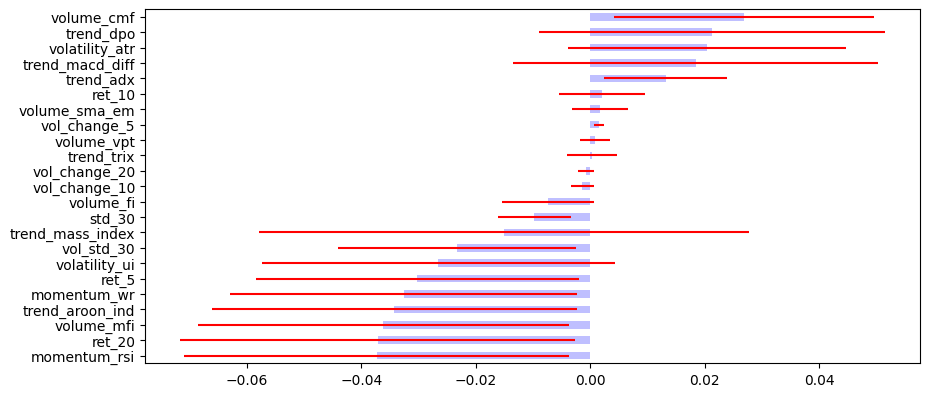

In [12]:
# Q. 코드를 작성해주세요

# 1. 기본적인 Feature Importance (MDI) 확인
# rfc.feature_importances_를 'mean'과 'std' 컬럼이 있는 DataFrame으로 만듭니다.
feat_imp = pd.DataFrame({
    'mean': rfc.feature_importances_,
    'std': 0  # MDI는 단일 계산값이므로 표준편차를 0으로 설정
}, index=X_sc.columns)

plot_feature_importance(feat_imp)


# 2. MDA (Mean Decrease Accuracy) 방식 확인
# imp.mean_decrease_accuracy 함수는 보통 'mean'과 'std'가 포함된 DataFrame을 반환합니다.
feat_imp_mda = imp.mean_decrease_accuracy(rfc, X_sc, y, cv_gen=KFold(n_splits=5))

plot_feature_importance(feat_imp_mda)

In [13]:
# Q. 코드를 작성해주세요

# RFE CV, Recursive Feature Elimination
svc_rbf = SVC(kernel='linear', probability=True)
rfe_cv = RFECV(estimator=svc_rbf, step=1, cv=KFold(n_splits=5), scoring='accuracy', n_jobs=-1)
rfe_fitted = rfe_cv.fit(X_sc, y)

✅ 최적의 피처 개수 : 3
✅ 선택된 피처 목록 : ['volatility_atr', 'trend_macd_diff', 'std_30']

--- 🏆 피처별 순위 (Top 10) ---
trend_macd_diff    1
volatility_atr     1
std_30             1
momentum_rsi       2
momentum_wr        3
volatility_ui      4
volume_fi          5
trend_trix         6
volume_sma_em      7
volume_vpt         8
dtype: int64


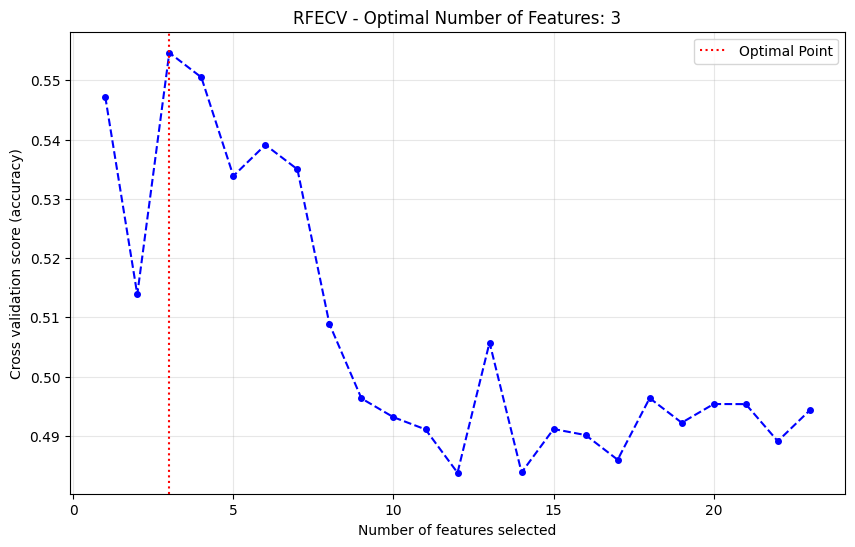

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. 최적의 피처 개수 및 목록 추출
print(f"✅ 최적의 피처 개수 : {rfe_fitted.n_features_}")

selected_features = X_sc.columns[rfe_fitted.support_]
print(f"✅ 선택된 피처 목록 : {selected_features.tolist()}")

# 2. 피처별 순위(Ranking) 확인
# 1위가 최종 선택된 피처이며, 숫자가 클수록 모델 기여도가 낮아 일찍 탈락한 피처입니다.
feature_ranking = pd.Series(rfe_fitted.ranking_, index=X_sc.columns).sort_values()
print("\n--- 🏆 피처별 순위 (Top 10) ---")
print(feature_ranking.head(10))

# 3. 교차 검증 점수 시각화 (버전 호환성 해결)
plt.figure(figsize=(10, 6))

# sklearn 버전에 따라 결과 추출 방식 변경
if hasattr(rfe_fitted, 'cv_results_'):
    # 최신 버전 (1.0+)
    scores = rfe_fitted.cv_results_['mean_test_score']
else:
    # 구 버전
    scores = rfe_fitted.grid_scores_

plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='--', color='b', markersize=4)
plt.title(f"RFECV - Optimal Number of Features: {rfe_fitted.n_features_}")
plt.grid(True, alpha=0.3)
plt.axvline(x=rfe_fitted.n_features_, color='r', linestyle=':', label='Optimal Point')
plt.legend()
plt.show()

In [15]:
# NumPy 버전을 1.2x 대로 강제 재설치
!pip install --upgrade "numpy<2.0"

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.5
    Uninstalling numpy-2.3.5:
      Successfully uninstalled numpy-2.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shap 0.50.0 requires scikit-learn, which is not installed.
esda 2.8.1 requires scikit-learn>=1.4, which is not installed.
fastai 2.8.6 requires scikit-learn, which is not installed.
segregation 2.5.3 requires scikit-learn>=0.21.3, which is not installed.
sentence-transformers 5.2.0 requires scikit-learn, which is not installed.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, which is not installed.
hdbscan 0.8.41 requires scikit-learn>=1.6, which is not installed.
tsfres

In [16]:
!pip install --upgrade shap numba

  Using cached numpy-2.4.1-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (6.6 kB)
  Using cached scikit_learn-1.8.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (11 kB)
  Using cached numpy-2.3.5-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.5-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.6 MB)
Using cached scikit_learn-1.8.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (8.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_v

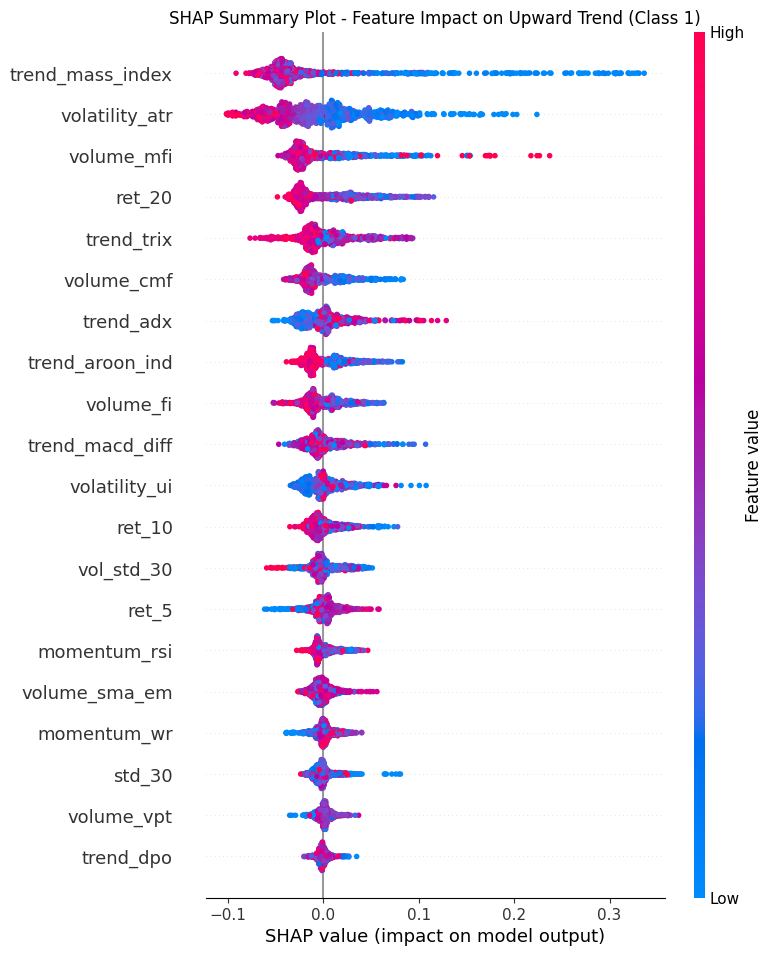

In [17]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# 1. Explainer 정의 (TreeExplainer는 RF, XGBoost 등에 최적화됨)
explainer = shap.TreeExplainer(rfc)

# 2. SHAP Value 계산
shap_values = explainer.shap_values(X_sc)

# 3. 데이터 구조에 따른 인덱싱 처리
# SHAP 결과가 리스트인지, 넘파이 배열인지 확인하여 '상승(1)' 클래스 데이터만 추출합니다.
if isinstance(shap_values, list):
    # 리스트 형태인 경우 (구버전 또는 특정 환경)
    shap_to_plot = shap_values[1]
elif isinstance(shap_values, np.ndarray) and len(shap_values.shape) == 3:
    # 3차원 배열 형태인 경우 [samples, features, classes]
    # 마지막 차원이 클래스이므로 [:, :, 1]을 선택
    shap_to_plot = shap_values[:, :, 1]
else:
    # 그 외 (회귀 모델 등 단일 출력인 경우)
    shap_to_plot = shap_values

# 4. shap.summary_plot 그리기
# 시각적 가독성을 위해 테마를 설정하고 그래프를 출력합니다.
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_to_plot, X_sc, show=False)
plt.title("SHAP Summary Plot - Feature Impact on Upward Trend (Class 1)")
plt.show()

In [3]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve

sys.path.append('/contents')
from libs.mlutil.pkfold import PKFold

In [9]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. 데이터 경로 설정 및 불러오기 (환경에 맞게 조정)
DATA_PATH = '/content'
df_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_feature_labels.pkl')
df_tmp_data = pd.read_pickle(data_file_name)

# 2. 라벨 분포 확인 (메모리에 있는 df_tmp_data 사용)
print("--- Label Counts (t_value) ---")
print(df_tmp_data['t_value'].value_counts())

# 3. 피처(X)와 라벨(y) 분리
# iloc[:, 5:-1] -> 지표 데이터 컬럼들
# iloc[:, -1] -> 타겟 라벨 (t_value)
X = df_tmp_data.iloc[:, 5:-1]
y = df_tmp_data.iloc[:, -1]

# 4. 데이터셋 비율에 따른 인덱스 계산
train_ratio, test_ratio = 0.7, 0.2
n_total = len(df_tmp_data)
n_train = int(np.round(n_total * train_ratio))
n_test = int(np.round(n_total * test_ratio))

# 5. 스케일링 (Standardization)
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# 6. 시계열 순서를 유지한 데이터셋 분리 (Slicing)
train_x_raw, train_y_raw = X_sc[:n_train, :], y.iloc[:n_train]
test_x_raw, test_y_raw = X_sc[-n_test:, :], y.iloc[-n_test:]

# 7. DataFrame/Series 형태로 복원 및 인덱스 부여
train_x = pd.DataFrame(train_x_raw, index=train_y_raw.index, columns=X.columns)
train_y = pd.Series(train_y_raw, index=train_y_raw.index)

test_x = pd.DataFrame(test_x_raw, index=test_y_raw.index, columns=X.columns)
test_y = pd.Series(test_y_raw, index=test_y_raw.index)

# 8. 학습 데이터 제한 (학습 시간 단축용)
# 현재 데이터가 957개이므로 1000개 설정 시 전체가 선택됩니다.
limit = 1000
train_x = train_x.iloc[:limit]
train_y = train_y.iloc[:limit]

print("\n--- 데이터 분리 결과 확인 ---")
print(f"전체 데이터 수: {n_total}")
print(f"학습용(train_x): {train_x.shape}")
print(f"테스트용(test_x): {test_x.shape}")

--- Label Counts (t_value) ---
t_value
-1.0    306630
-0.0    302946
 1.0    299269
Name: count, dtype: int64

--- 데이터 분리 결과 확인 ---
전체 데이터 수: 908845
학습용(train_x): (1000, 23)
테스트용(test_x): (181769, 23)


In [5]:
%whos

Variable                 Type        Data/Info
----------------------------------------------
BaggingClassifier        ABCMeta     <class 'sklearn.ensemble.<...>gging.BaggingClassifier'>
DATA_PATH                str         /aiffel/aiffel/fnguide/data/
GridSearchCV             ABCMeta     <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
KFold                    ABCMeta     <class 'sklearn.model_selection._split.KFold'>
PKFold                   ABCMeta     <class 'libs.mlutil.pkfold.PKFold'>
RandomForestClassifier   ABCMeta     <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
StandardScaler           type        <class 'sklearn.preproces<...>ng._data.StandardScaler'>
accuracy_score           function    <function accuracy_score at 0x7f9a28179300>
confusion_matrix         function    <function confusion_matrix at 0x7f9a28179440>
data_file_name           str         /aiffel/aiffel/fnguide/da<...>th_min_feature_labels.pkl
datetime                 module      <module 'datetime

In [11]:
# 기존 코드에서 경로를 한 단계 더 깊게 들어가거나 클래스를 명시합니다.
# 파일 구조가 libs/mlutil/pkfold/PKFold.py 인 경우:
from libs.mlutil import pkfold

# 혹은 아래와 같이 시도해보세요.
# import libs.mlutil.pkfold.PKFold as pk
# cv = pk.PKFold(n_splits=n_cv, samples_info_sets=t1, pct_embargo=0.01)

# 1. n_cv 설정
n_cv = 4

# 2. t1 설정
t1 = pd.Series(train_y.index.values, index=train_y.index)

# 3. Purged K-Fold 정의
# 여기서 'module' object is not callable 에러가 났다면 아래와 같이 호출하세요.
cv = PKFold(n_splits=n_cv, samples_info_sets=t1, pct_embargo=0.01)

In [12]:
# GridsearchCV에서 사용할 파라미터 설정합니다. 파라미터값을 바꿔보세요
bc_params = {'n_estimators': [5, 10, 20],
             'max_features': [0.5, 0.7],
             'base_estimator__max_depth': [3,5,10,20],
             'base_estimator__max_features': [None, 'auto'],
             'base_estimator__min_samples_leaf': [3, 5, 10],
             'bootstrap_features': [False, True]
            }

In [13]:
# RandomForest 사용
rfc = RandomForestClassifier(class_weight='balanced')

In [14]:
# Q. 코드를 작성해주세요

# 1. 베이스 모델 설정 (앞서 정의한 rfc 사용)
rfc = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced', # 혹은 'balanced_subsample'
    n_jobs=-1,
    random_state=42
)

# 2. Bagging 적용
# n_estimators: 부트스트랩 샘플 개수 (보통 10~50개 설정)
# max_samples: 각 결정 트리가 학습할 데이터의 비율
# n_jobs=-1: 모든 CPU 코어 사용
bag_rfc = BaggingClassifier(
    estimator=rfc,
    n_estimators=10,
    max_samples=0.8,
    max_features=1.0,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

# 3. 모델 학습 (훈련 데이터 사용)
bag_rfc.fit(train_x, train_y)

print("✅ 성공: Bagging이 적용된 RandomForest 모델 학습이 완료되었습니다.")

✅ 성공: Bagging이 적용된 RandomForest 모델 학습이 완료되었습니다.


In [15]:
from sklearn.model_selection import GridSearchCV

# 1. 하이퍼파라미터 그리드 설정
# 모델의 성능을 최적화하기 위한 후보군입니다.
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 5]
}

# 2. GridSearchCV 객체 생성 (gs_rfc 정의)
# 이전에 만든 cv (Purged K-Fold)를 여기에 적용합니다.
gs_rfc = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=cv,
    n_jobs=-1,
    scoring='accuracy'
)

# 3. 모델 학습 (이제 NameError가 발생하지 않습니다)
gs_rfc.fit(train_x, train_y)

# 4. 최적의 모델 추출 및 재학습
gs_rfc_best = gs_rfc.best_estimator_  # 언더바(_)가 붙어야 함에 주의하세요!
gs_rfc_best.fit(train_x, train_y)

print(f"✅ 최적 파라미터: {gs_rfc.best_params_}")

/content/libs/mlutil/pkfold.py:97: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_times = pd.Series(index=[self.samples_info_sets.index[start_ix]], data=[self.samples_info_sets[end_ix-1]])


✅ 최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 200}


In [16]:
# 예측값 확인
pred_y = gs_rfc_best.predict(test_x)
prob_y = gs_rfc_best.predict_proba(test_x)

In [17]:
# 1. 테스트 데이터에 대한 예측 수행
pred_y = gs_rfc_best.predict(test_x)

# 2. 지표 계산 수행
confusion = confusion_matrix(test_y, pred_y)

# 다중 분류(Multiclass) 대응을 위해 average 옵션을 추가합니다.
# 'macro': 각 클래스의 지표를 단순 평균 (클래스별 중요도가 동일할 때)
# 'weighted': 각 클래스의 샘플 수에 따라 가중 평균 (데이터 불균형 고려 시)
accuracy  = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y, average='macro')
recall    = recall_score(test_y, pred_y, average='macro')

# 3. 지표를 통한 결과 확인
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'정확도: {accuracy:.4f}, 정밀도(Macro): {precision:.4f}, 재현율(Macro): {recall:.4f}')

================= confusion matrix ====================
[[ 6394 46427 12433]
 [ 4352 35716 15990]
 [ 3048 33175 24234]]
정확도: 0.3650, 정밀도(Macro): 0.4112, 재현율(Macro): 0.3787


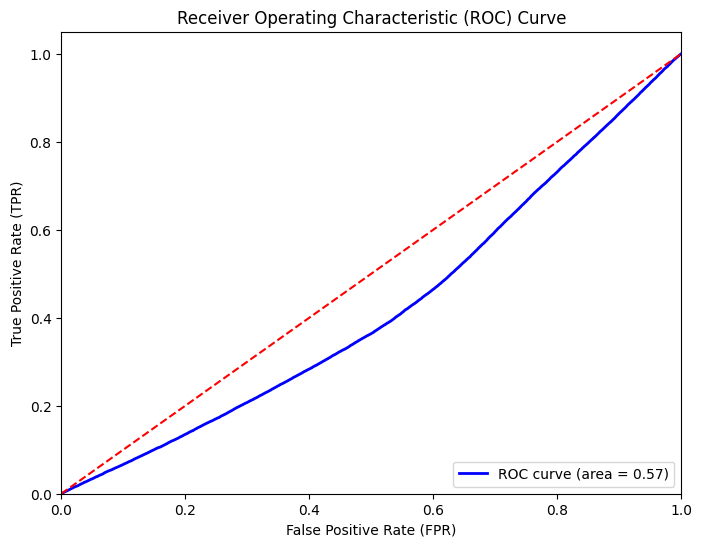

AUC Score: 0.5686


In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

# 1. 클래스별 예측 확률 계산
# predict_proba 결과는 [클래스0 확률, 클래스1 확률, ...] 형태입니다.
# 다중 클래스에서 특정 클래스(보통 Class 1인 '상승')의 확률만 가져옵니다.
y_score = gs_rfc_best.predict_proba(test_x)

# 2. ROC curve 데이터 생성
# 다중 클래스일 경우, roc_curve는 이진 분류용이므로 특정 클래스를 기준으로 뽑아야 합니다.
# 여기서는 '상승(1)' 클래스를 기준으로 분석한다고 가정합니다.
# 만약 클래스가 0, 1, 2인 다중 분류라면 분석하고 싶은 클래스의 인덱스를 선택하세요.
# pos_label=1은 클래스 '1'을 양성으로 간주하겠다는 의미입니다.
fpr, tpr, thresholds = roc_curve(test_y, y_score[:, 1], pos_label=1)

# 3. AUC 계산
# 'ovr' (One-vs-Rest) 방식을 사용하여 전체적인 모델의 변별력을 수치화합니다.
auc = roc_auc_score(test_y, y_score, multi_class='ovr')

# 4. ROC curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') # 대각선 점선 (무작위 예측)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f'AUC Score: {auc:.4f}')

In [19]:
# 1. 2진 분류로 테스트해보기 (보합 클래스 1을 제외)
# 데이터 정제 단계에서 아래 코드를 추가해보세요.
df_binary = df_tmp_data[df_tmp_data['t_value'] != 1].copy()

# 2. 클래스 가중치 제거 혹은 조정
# 아까 추가한 class_weight='balanced'가 오히려 보합(적은 데이터)을
# 억지로 맞추려다 전체 정확도를 깎았을 수 있습니다. 이를 제거해봅니다.
rfc = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,     # 모델을 더 단순하게 (과적합 방지)
    n_jobs=-1,
    random_state=42
)

# 3. 핵심 피처 3개만 사용
selected_features = ['volatility_atr', 'trend_macd_diff', 'std_30']
train_x_sub = train_x[selected_features]
test_x_sub = test_x[selected_features]

# 다시 학습
gs_rfc_best.fit(train_x_sub, train_y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [20]:
from sklearn.model_selection import GridSearchCV

# 1. 하이퍼파라미터 그리드 설정
# 모델의 성능을 최적화하기 위한 후보군입니다.
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 5]
}

# 2. GridSearchCV 객체 생성 (gs_rfc 정의)
# 이전에 만든 cv (Purged K-Fold)를 여기에 적용합니다.
gs_rfc = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=cv,
    n_jobs=-1,
    scoring='accuracy'
)

# 3. 모델 학습 (이제 NameError가 발생하지 않습니다)
gs_rfc.fit(train_x, train_y)

# 4. 최적의 모델 추출 및 재학습
gs_rfc_best = gs_rfc.best_estimator_  # 언더바(_)가 붙어야 함에 주의하세요!
gs_rfc_best.fit(train_x, train_y)

print(f"✅ 최적 파라미터: {gs_rfc.best_params_}")

/content/libs/mlutil/pkfold.py:97: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_times = pd.Series(index=[self.samples_info_sets.index[start_ix]], data=[self.samples_info_sets[end_ix-1]])


✅ 최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 200}


In [22]:
pred_y = gs_rfc_best.predict(test_x)
prob_y = gs_rfc_best.predict_proba(test_x)

In [23]:
# 1. 테스트 데이터에 대한 예측 수행
pred_y = gs_rfc_best.predict(test_x)

# 2. 지표 계산 수행
confusion = confusion_matrix(test_y, pred_y)

# 다중 분류(Multiclass) 대응을 위해 average 옵션을 추가합니다.
# 'macro': 각 클래스의 지표를 단순 평균 (클래스별 중요도가 동일할 때)
# 'weighted': 각 클래스의 샘플 수에 따라 가중 평균 (데이터 불균형 고려 시)
accuracy  = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y, average='macro')
recall    = recall_score(test_y, pred_y, average='macro')

# 3. 지표를 통한 결과 확인
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'정확도: {accuracy:.4f}, 정밀도(Macro): {precision:.4f}, 재현율(Macro): {recall:.4f}')

================= confusion matrix ====================
[[ 3443 46326 15485]
 [ 2571 33914 19573]
 [ 1970 29665 28822]]
정확도: 0.3641, 정밀도(Macro): 0.3970, 재현율(Macro): 0.3782


In [28]:
"""
Created on Fri Dec  6 19:41:30 2019

@author: sukji
"""
from typing import Callable
import pandas as pd
import numpy as np

from sklearn.metrics import log_loss
from sklearn.model_selection import KFold
from sklearn.base import ClassifierMixin
from sklearn.model_selection import BaseCrossValidator

def ml_get_train_times1(samples_info_sets: pd.Series, test_times: pd.Series) -> pd.Series:
    # pylint: disable=invalid-name
    """
    Advances in Financial Machine Learning, Snippet 7.1, page 106.

    Purging observations in the training set

    This function find the training set indexes given the information on which each record is based
    and the range for the test set.
    Given test_times, find the times of the training observations.

    :param samples_info_sets: (pd.Series) The information range on which each record is constructed from
        *samples_info_sets.index*: Time when the information extraction started.
        *samples_info_sets.value*: Time when the information extraction ended.
    :param test_times: (pd.Series) Times for the test dataset.
    :return: (pd.Series) Training set
    """
    train = samples_info_sets.copy(deep=True)

    start = test_times.min()
    end = test_times.max()

    first = test_times.index[0]
    last = test_times.index[-1]

    df0 = train[(train < first) | (train.index > end)].index  # Train starts within test
    return df0

class PKFold(KFold):
    """
    Extend KFold class to work with labels that span intervals

    The train is purged of observations overlapping test-label intervals
    Test set is assumed contiguous (shuffle=False), w/o training samples in between

    :param n_splits: (int) The number of splits. Default to 3
    :param samples_info_sets: (pd.Series) The information range on which each record is constructed from
        *samples_info_sets.index*: Time when the information extraction started.
        *samples_info_sets.value*: Time when the information extraction ended.
    :param pct_embargo: (float) Percent that determines the embargo size.
    """

    def __init__(self,
                 n_splits: int = 3,
                 samples_info_sets: pd.Series = None,
                 pct_embargo: float = 0.):

        if not isinstance(samples_info_sets, pd.Series):
            raise ValueError('The samples_info_sets param must be a pd.Series')
        super(PKFold, self).__init__(n_splits, shuffle=False, random_state=None)

        self.samples_info_sets = samples_info_sets
        self.pct_embargo = pct_embargo

    # noinspection PyPep8Naming
    def split(self,
              X: pd.DataFrame,
              y: pd.Series = None,
              groups=None):
        """
        The main method to call for the PurgedKFold class

        :param X: (pd.DataFrame) Samples dataset that is to be split
        :param y: (pd.Series) Sample labels series
        :param groups: (array-like), with shape (n_samples,), optional
            Group labels for the samples used while splitting the dataset into
            train/test set.
        :return: (tuple) [train list of sample indices, and test list of sample indices]
        """
        if X.shape[0] != self.samples_info_sets.shape[0]:
            raise ValueError("X and the 'samples_info_sets' series param must be the same length")

        indices: np.ndarray = np.arange(X.shape[0])
        embargo: int = int(X.shape[0] * self.pct_embargo)

        test_ranges: [(int, int)] = [(ix[0], ix[-1] + 1) for ix in np.array_split(np.arange(X.shape[0]), self.n_splits)]
        for start_ix, end_ix in test_ranges:
            test_indices = indices[start_ix:end_ix]

            if end_ix < X.shape[0]:
                end_ix += embargo

            test_times = pd.Series(index=[self.samples_info_sets.index[start_ix]], data=[self.samples_info_sets[end_ix-1]])
            #train_times = ml_get_train_times(self.samples_info_sets, test_times)
            train_times = ml_get_train_times1(self.samples_info_sets, test_times)

            train_indices = []
            for train_ix in train_times:
                train_indices.append(self.samples_info_sets.index.get_loc(train_ix))
            yield np.array(train_indices), test_indices

In [29]:
DATA_PATH = '.'
data_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_feature_labels.pkl')

In [30]:
df_data = pd.read_pickle(data_file_name)
df_data['t_value'] = df_data['t_value'].apply(lambda x: x if x == 1 else 0)

In [31]:
train_ratio, test_ratio = 0.7, 0.2
n_train = int(np.round(len(df_data) * train_ratio))
n_test = int(np.round(len(df_data) * test_ratio))

In [32]:
X, y = df_data.iloc[:, 5:-1], df_data.iloc[:, -1]

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [33]:
train_x, test_x, train_y, test_y = X_sc[:n_train, :], X_sc[-n_test:, :], y.iloc[:n_train], y.iloc[-n_test:]

train_x = pd.DataFrame(train_x, index=train_y.index, columns=X.columns)
train_y = pd.Series(train_y, index=train_y.index)
test_x = pd.DataFrame(test_x, index=test_y.index, columns=X.columns)
test_y = pd.Series(test_y, index=test_y.index)

# 학습 시간 단축을 위해 여기선 편의상 1000개의 데이터만 가져옵니다.
train_x = train_x[:1000]
train_y = train_y[:1000]

In [34]:
n_cv = 4
t1 = pd.Series(train_y.index.values, index=train_y.index)
# purged K-Fold
cv = PKFold(n_cv, t1, 0)

In [35]:
# 최대 20분정도가 소요됩니다. 시간이 부족하다면 파라미터를 조절하여 진행하세요.
# 파라미터 명을 변경해야합니다
# 'base_estimator__max_depth': [3,5,10,20],
# base 모조리 빼버리기

bc_params = {'n_estimators': [5, 10, 20],
             'max_features': [0.5, 0.7],
             'estimator__max_depth': [3,5,10,20],
             'estimator__max_features': [None, 'auto'],
             'estimator__min_samples_leaf': [3, 5, 10],
             'bootstrap_features': [False, True]
            }

rfc = RandomForestClassifier(class_weight='balanced')
bag_rfc = BaggingClassifier(rfc)
gs_rfc = GridSearchCV(bag_rfc, bc_params, cv=cv, n_jobs=-1, verbose=1)
gs_rfc.fit(train_x, train_y)
gs_rfc_best = gs_rfc.best_estimator_

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


/tmp/ipython-input-3276306590.py:97: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_times = pd.Series(index=[self.samples_info_sets.index[start_ix]], data=[self.samples_info_sets[end_ix-1]])
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:490: FitFailedWarning: 
576 fits failed out of a total of 1152.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 83

In [36]:
gs_rfc_best.fit(train_x, train_y)

,"estimator estimator: object, default=NoneThe base estimator to fit on random subsets of the dataset.If None, then the base estimator is a:class:`~sklearn.tree.DecisionTreeClassifier`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",RandomForestC...amples_leaf=3)
,"n_estimators n_estimators: int, default=10The number of base estimators in the ensemble.",5
,"max_samples max_samples: int or float, default=NoneThe number of samples to draw from X to train each base estimator (withreplacement by default, see `bootstrap` for more details).- If None, then draw `X.shape[0]` samples irrespective of `sample_weight`.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` unweighted samples or `max_samples * sample_weight.sum()` weighted samples.",None
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator (without replacement by default, see `bootstrap_features` for moredetails).- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.",0.5
,"bootstrap bootstrap: bool, default=TrueWhether samples are drawn with replacement. If False, sampling withoutreplacement is performed. If fitting with `sample_weight`, it isstrongly recommended to choose True, as only drawing with replacementwill ensure the expected frequency semantics of `sample_weight`.",True
,"bootstrap_features bootstrap_features: bool, default=FalseWhether features are drawn with replacement.",False
,"oob_score oob_score: bool, default=FalseWhether to use out-of-bag samples to estimatethe generalization error. Only available if bootstrap=True.",False
,"warm_start warm_start: bool, default=FalseWhen set to True, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fita whole new ensemble. See :term:`the Glossary `... versionadded:: 0.17 *warm_start* constructor parameter.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for both :meth:`fit` and:meth:`predict`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random resampling of the original dataset(sample wise and feature wise).If the base estimator accepts a `random_state` attribute, a differentseed is generated for each instance in the ensemble.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"verbose verbose: int, default=0Controls the verbosity when fitting and predicting.",0


In [37]:
pred_y = gs_rfc_best.predict(test_x)  # [1,0,1,0,0,0,0]
prob_y = gs_rfc_best.predict_proba(test_x) # [[0.7,0.3]]

In [38]:
confusion = confusion_matrix(test_y, pred_y)
accuracy  = accuracy_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
recall    = recall_score(test_y, pred_y)

print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'정확도:{accuracy}, 정밀도:{precision}, 재현율:{recall}')

================= confusion matrix ====================
[[118102   3210]
 [ 55807   4650]]
정확도:0.6753186737012362, 정밀도:0.5916030534351145, 재현율:0.07691417040210398
